In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [ ]:


file_path='C:/Users/HP/Downloads/employee_promotion_data.csv'
df=pd.read_csv(file_path)
print(df.head(5))

  EmployeeID         Department         Education Gender RecruitmentChannel  \
0   EID_2378  Sales & Marketing  Master's & above      f           Sourcing   
1    EID_839         Operations        Bachelor's      m              Other   
2   EID_1546  Sales & Marketing        Bachelor's      m           Sourcing   
3   EID_4573         Technology        Bachelor's      m              Other   
4   EID_9396          Analytics        Bachelor's      m              Other   

   TrainingSessionsAttended  Age  LastPerformanceRating  YearsAtCompany  \
0                         1   35                      5               8   
1                         1   30                      5               4   
2                         1   34                      3               7   
3                         1   39                      1              10   
4                         2   45                      3               2   

   AwardsWon  AvgTrainingScore  IsPromoted  
0          0                4

In [18]:
df=df.drop('EmployeeID',axis=1)
df=pd.get_dummies(df,columns=['Department','Education','RecruitmentChannel'],drop_first=True)
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])


In [19]:
X=df.drop('IsPromoted',axis=1)
y=df['IsPromoted']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"model accuracy:{accuracy:.2f}")
print()


model accuracy:0.88



In [20]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

<Figure size 600x600 with 0 Axes>

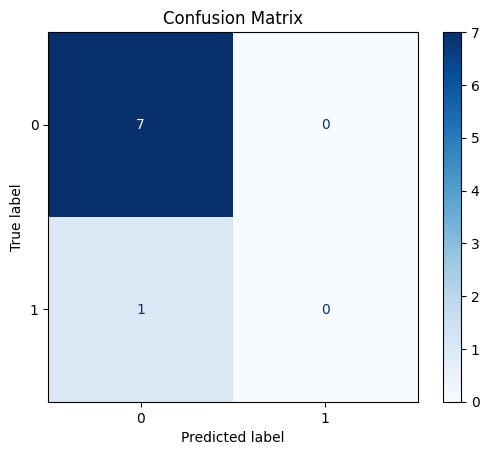

In [21]:
plt.figure(figsize=(6,6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

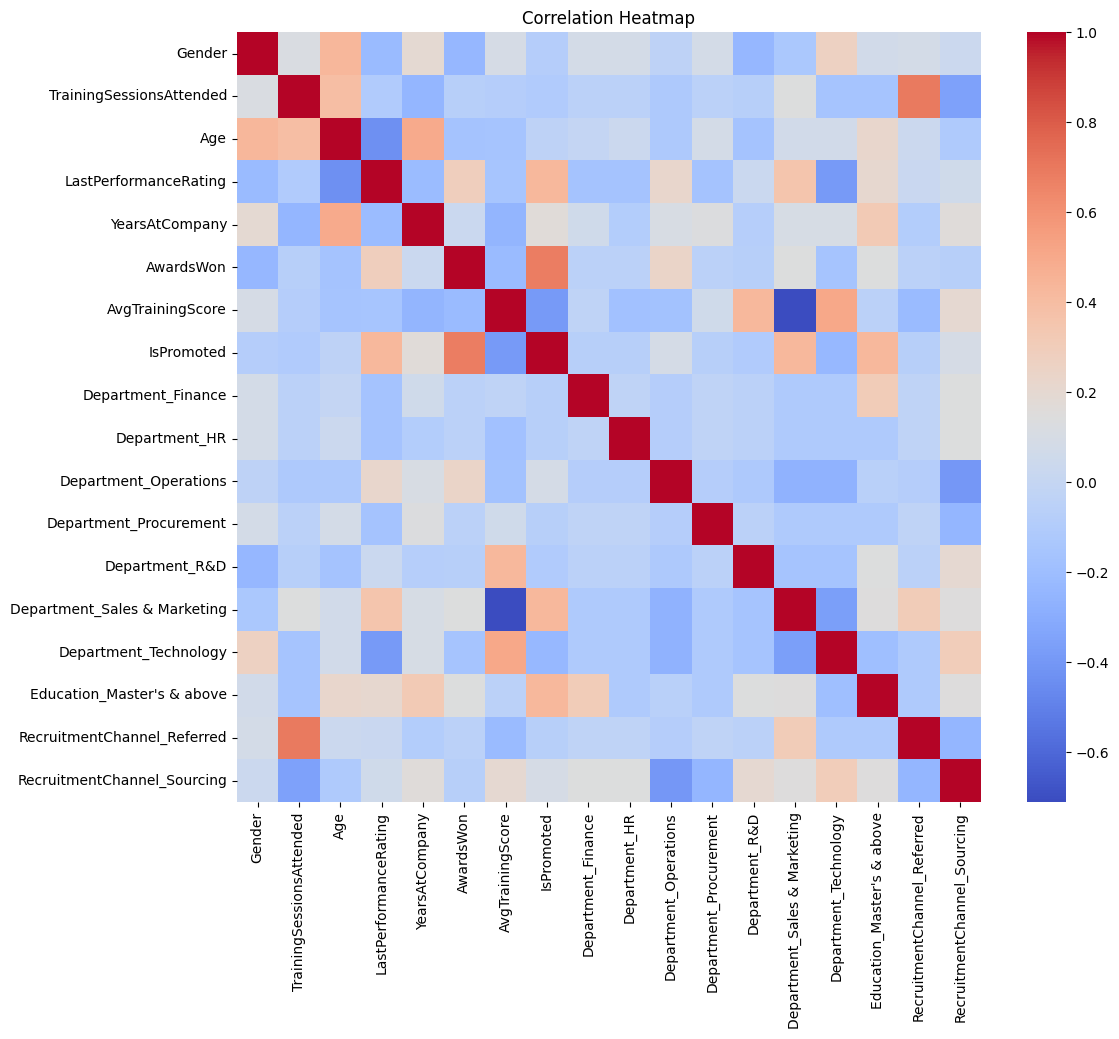

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()
